# Evaluation of machine learning models for appeal prediction
This script uses the extracted features from image folder, and performs traditional ML models for the prediction.

In [ ]:
!pip3 install auto-sklearn  # you may need to rerun the script after performing this command

In [1]:
%matplotlib inline

from IPython.display import display as d
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})
sns.set_style("white")
import glob
import json
import os
import sys
from sklearn.ensemble import RandomForestRegressor

from pprint import pprint

import sklearn.datasets
import sklearn.metrics

import autosklearn.regression
import matplotlib.pyplot as plt


In [2]:
dfeatures  = pd.read_csv("../images/all_features.csv")
# dfeatures also includes target prediction columns

non_feature_cols = ["mos", "image", "dominant_color", "filename", "num_ratings", "ci", "std"] + [x for x in dfeatures.columns if "count_" in x]
d(dfeatures) 
print(non_feature_cols)
print(list(dfeatures.columns.difference(non_feature_cols)))


,image,nima_q,nima_a,blur,blur_stength,ci,color_fulness,contrast,count_1,count_2,...,saturation,si,simplicity,std,std_depth,std_segmentation,tone,unisalconnected_components,unisalmean_saliency,unisalstd_saliency
0,pixabay_first50k/medium/still-life-art-and-lit...,5.201666,5.443225,26406.702098,0.327312,0.502772,138.659979,84.181416,2,1,...,45.451583,0.232381,2.163852e-05,1.162660,16945.347024,3.252017,0.759826,6,0.018195,0.133656
1,pixabay_first50k/medium/textures-3668419.jpg,5.092143,5.644749,67384.029520,0.268583,0.513747,104.675082,83.552939,4,7,...,43.201122,0.382488,9.852608e-07,1.298695,16790.058447,0.968191,0.577008,2,0.160672,0.367228
2,pixabay_first50k/medium/goose-3190750.jpg,5.255114,5.531336,48336.483041,0.417756,0.401333,52.028023,80.851269,2,2,...,11.047839,0.255594,9.999940e-01,1.074789,21863.079921,1.287890,0.788853,8,0.030221,0.171194
3,pixabay_first50k/medium/swan-fight-4066486.jpg,5.195546,5.461508,48337.186393,0.439059,0.405074,128.999337,88.055617,0,6,...,15.047624,0.314595,9.974234e-01,0.936734,19387.248858,1.091901,0.610565,2,0.039222,0.194122
4,pixabay_first50k/medium/el-capitan-4933472.jpg,4.831330,5.597155,58812.675989,0.223902,0.429635,153.932848,84.466508,0,3,...,35.516140,0.396389,2.065818e-05,1.040833,12562.584776,0.794549,0.702838,5,0.065129,0.246754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,koniq10k/medium/1289162225.jpg,4.859053,4.632835,137118.276066,0.299908,0.425412,141.939105,90.390416,6,7,...,7.646802,0.386891,9.142610e-01,1.199747,21645.689315,3.795820,0.641046,7,0.027771,0.164317
1022,koniq10k/medium/4551121129.jpg,5.217058,5.116648,142481.662501,0.277882,0.344962,137.463009,86.373567,1,4,...,39.050476,0.407439,9.633499e-01,0.797724,17954.100246,0.893128,0.762570,17,0.014751,0.120553
1023,koniq10k/medium/4605755313.jpg,4.330168,5.056751,423006.937656,0.238177,0.441372,153.328991,89.459027,0,4,...,9.260073,0.599511,2.755574e-08,1.069268,19269.845387,3.291512,0.499647,67,0.032618,0.177633
1024,koniq10k/medium/4034220859.jpg,5.058482,4.578805,1017.217432,0.461570,0.435794,61.733606,94.065372,8,6,...,88.385312,0.073388,9.997045e-01,1.167077,19121.098945,1.339804,0.432870,2,0.009183,0.095386


['mos', 'image', 'dominant_color', 'filename', 'num_ratings', 'ci', 'std', 'count_1', 'count_2', 'count_3', 'count_4', 'count_5']
['blur', 'blur_stength', 'color_fulness', 'contrast', 'cpbd', 'deepgaze_connected_components', 'deepgaze_mean_saliency', 'deepgaze_std_saliency', 'fft', 'mean_depth', 'mean_dominant_color', 'mean_segmentation', 'neg', 'neu', 'nima_a', 'nima_q', 'niqe', 'noise', 'number_segmentation', 'pos', 'rule_of_thirds', 'saturation', 'si', 'simplicity', 'std_depth', 'std_segmentation', 'tone', 'unisalconnected_components', 'unisalmean_saliency', 'unisalstd_saliency']


In [4]:
X = dfeatures[dfeatures.columns.difference(non_feature_cols)].values
y = dfeatures["mos"].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)

In [5]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='./autosklearn_regression_example_tmp__',
    memory_limit=None
)
automl.fit(X_train, y_train, dataset_name='image_appeal')


/home/sgoering/.local/lib/python3.8/site-packages/autosklearn/metalearning/metalearning/meta_base.py:68: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.metafeatures = self.metafeatures.append(metafeatures)
/home/sgoering/.local/lib/python3.8/site-packages/autosklearn/metalearning/metalearning/meta_base.py:72: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.algorithm_runs[metric].append(runs)


AutoSklearnRegressor(memory_limit=None, per_run_time_limit=30,
                     time_left_for_this_task=120,
                     tmp_folder='./autosklearn_regression_example_tmp__')

In [6]:
print(automl.leaderboard())

          rank  ensemble_weight            type      cost   duration
model_id                                                            
2            1             0.52   random_forest  0.574423   7.865009
4            2             0.22     extra_trees  0.600482  16.048742
7            3             0.26  ard_regression  0.741105   1.350715


In [7]:
pprint(automl.show_models(), indent=4)

{   2: {   'cost': 0.5744227329059352,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f92a4d27880>,
           'ensemble_weight': 0.52,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f92a4d2b3a0>,
           'model_id': 2,
           'rank': 1,
           'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f92a4d2b4c0>,
           'sklearn_regressor': RandomForestRegressor(max_features=1.0, n_estimators=512, n_jobs=1,
                      random_state=1, warm_start=True)},
    4: {   'cost': 0.6004817574492551,
           'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f92a4d24670>,
           'ensemble_weight': 0.22,
           'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object 

Train R2 score: 0.7930175938756225
Test R2 score: 0.4651008689168623


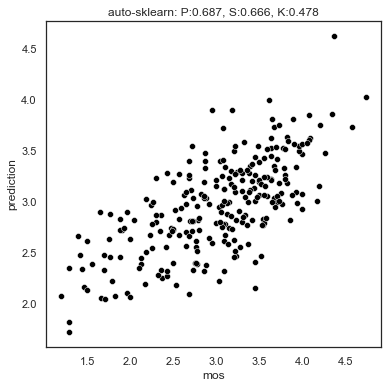

In [8]:
train_predictions = automl.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

metrics = []

dres = pd.DataFrame({
    "pred": test_predictions,
    "truth": y_test
})

sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

ax = sns.scatterplot(y="pred", x="truth", data=dres, color="black")
ax.set_ylabel("prediction")
ax.set_xlabel("mos")

col = "pred"
p = dres[["truth", col]].corr(method="pearson")["truth"].values[1]
k = dres[["truth", col]].corr(method="kendall")["truth"].values[1]
s = dres[["truth", col]].corr(method="spearman")["truth"].values[1]
metrics.append({
    "p": p,
    "k": k,
    "s": s,
    "-feature": "none"
}
)
title = f"auto-sklearn: P:{p.round(3)}, S:{s.round(3)}, K:{k.round(3)}"
ax.set_title(title)

ax.get_figure().savefig("scatterplot_prediction_autosklearn.pdf", bbox_inches="tight")

In [ ]:
# check individual features

for feature_col in dfeatures.columns.difference(non_feature_cols):
    
    X = dfeatures[dfeatures.columns.difference(non_feature_cols + [feature_col])].values
    y = dfeatures["mos"].values

    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)

    automl = autosklearn.regression.AutoSklearnRegressor(
        time_left_for_this_task=120,
        per_run_time_limit=30,
        tmp_folder='./autosklearn_regression_example_tmp',
    )
    automl.fit(X_train, y_train, dataset_name='image_appeal')
    train_predictions = automl.predict(X_train)

    print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
    test_predictions = automl.predict(X_test)
    print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

    dres = pd.DataFrame({
        "pred": test_predictions,
        "truth": y_test
    })
    sns.set(rc={'figure.figsize':(6,6)})
    sns.set_style("white")

    ax = sns.scatterplot(x="pred", y="truth", data=dres)

    col = "pred"
    p = dres[["truth", col]].corr(method="pearson")["truth"].values[1]
    k = dres[["truth", col]].corr(method="kendall")["truth"].values[1]
    s = dres[["truth", col]].corr(method="spearman")["truth"].values[1]
    metrics.append({
        "p": p,
        "k": k,
        "s": s,
        "-feature": feature_col
    })
    title = f"P:{p.round(3)}, S:{s.round(3)}, K:{k.round(3)}; FS-{feature_col}"
    ax.set_title(title)
    plt.show()

In [ ]:
dm = pd.DataFrame(metrics).sort_values(by="p")
d(dm)

In [ ]:
ax = sns.barplot(x="p", y="-feature", data=dm)
ax.set_title("feature set evaluation")
ax.set_xlabel("pearson")
ax.get_figure().savefig("feature_set_eval.pdf", bbox_inches="tight")
    

## DNN features combined with ML models
We use VGG19 as feature extractor as shown in ../ddn_features.
We skipped autosklearn, due to memory limitations and focus on pure RF-based models.

In [ ]:

# check dnn features (VGG19)
def flatten_features(x):
    res = {
        "img_path": x["img_path"],
    }
    for i in range(len(x["features"])):
        res[f"f[{i}]"] = x["features"][i]
    return pd.Series(res)

ddn = pd.read_json("../dnn_features/dnn_features.json.bz2").apply(flatten_features, axis=1)

d(ddn)

In [ ]:
if not os.path.isfile("dnn_features.csv.gz"):
    ddn.to_csv("dnn_features.csv.gz", index=False)

In [ ]:
ddn["img_path"] = ddn["img_path"].apply(lambda x: x.replace("../images/", ""))

In [ ]:
ddn_mos = pd.merge(dfeatures[["filename", "mos"]], ddn, left_on="filename", right_on="img_path")
d(ddn_mos)

In [ ]:
feature_columns = list(ddn_mos.columns.difference(["filename", "mos", "img_path"]))
X = ddn_mos[feature_columns].values
y = ddn_mos["mos"].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,
    n_jobs=-1, 
    random_state=42
)
rf.fit(X_train, y_train)

In [ ]:
train_predictions = rf.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = rf.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))

metrics = []

dres = pd.DataFrame({
    "pred": test_predictions,
    "truth": y_test
})
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

ax = sns.scatterplot(x="pred", y="truth", data=dres)

col = "pred"
p = dres[["truth", col]].corr(method="pearson")["truth"].values[1]
k = dres[["truth", col]].corr(method="kendall")["truth"].values[1]
s = dres[["truth", col]].corr(method="spearman")["truth"].values[1]
metrics.append({
    "p": p,
    "k": k,
    "s": s,
    "model": "dnnf"
}
)
title = f"dnn\nP:{p.round(3)}, S:{s.round(3)}, K:{k.round(3)}; DNN"
ax.set_title(title)

ax.get_figure().savefig("scatterplot_prediction_autosklearn_features_dnn_features.pdf", bbox_inches="tight")

In [ ]:
df_t = dfeatures[dfeatures.columns.difference(["mos", "image", "dominant_color", "num_ratings", "ci", "std"] + [x for x in dfeatures.columns if "count_" in x]
)].copy()

ddnnf = pd.merge(df_t, ddn_mos, left_on="filename", right_on="filename")
d(ddnnf)

In [ ]:
feature_columns = list(df_t.columns.difference(["filename", "mos", "img_path"]))
X = dfeatures[feature_columns].values
y = dfeatures["mos"].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)



In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,
    n_jobs=-1, 
    random_state=42
)
rf.fit(X_train, y_train)

In [ ]:
train_predictions = rf.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = rf.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))


dres = pd.DataFrame({
    "pred": test_predictions,
    "truth": y_test
})
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

ax = sns.scatterplot(x="pred", y="truth", data=dres)

col = "pred"
p = dres[["truth", col]].corr(method="pearson")["truth"].values[1]
k = dres[["truth", col]].corr(method="kendall")["truth"].values[1]
s = dres[["truth", col]].corr(method="spearman")["truth"].values[1]
metrics.append({
    "p": p,
    "k": k,
    "s": s,
    "model": "features"
}
)
title = f"features\nP:{p.round(3)}, S:{s.round(3)}, K:{k.round(3)}; DNN"
ax.set_title(title)

ax.get_figure().savefig("scatterplot_prediction_autosklearn_features__features.pdf", bbox_inches="tight")


In [ ]:
feature_columns = list(ddnnf.columns.difference(["filename", "mos", "img_path"]))
X = ddnnf[feature_columns].values
y = ddnnf["mos"].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,
    n_jobs=-1, 
    random_state=42
)
rf.fit(X_train, y_train)

In [ ]:
train_predictions = rf.predict(X_train)
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = rf.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))


dres = pd.DataFrame({
    "pred": test_predictions,
    "truth": y_test
})
sns.set(rc={'figure.figsize':(6,6)})
sns.set_style("white")

ax = sns.scatterplot(x="pred", y="truth", data=dres)

col = "pred"
p = dres[["truth", col]].corr(method="pearson")["truth"].values[1]
k = dres[["truth", col]].corr(method="kendall")["truth"].values[1]
s = dres[["truth", col]].corr(method="spearman")["truth"].values[1]
metrics.append({
    "p": p,
    "k": k,
    "s": s,
    "model": "dnnf+features"
}
)
title = f"dnn+features\nP:{p.round(3)}, S:{s.round(3)}, K:{k.round(3)}; DNN"
ax.set_title(title)

ax.get_figure().savefig("scatterplot_prediction_autosklearn_features_dnn_features_plus_features.pdf", bbox_inches="tight")


In [ ]:
# leave one out of the signal features

def evaluate(feature_col):
    feature_columns = list(ddnnf.columns.difference(["filename", "mos", "img_path", feature_col]))
    X = ddnnf[feature_columns].values
    y = ddnnf["mos"].values

    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)

    rf = RandomForestRegressor(
        n_estimators=100,
        n_jobs=-1, 
        random_state=42
    )
    rf.fit(X_train, y_train)

    test_predictions = rf.predict(X_test)

    dres = pd.DataFrame({
        "pred": test_predictions,
        "truth": y_test
    })

    col = "pred"
    p = dres[["truth", col]].corr(method="pearson")["truth"].values[1]
    k = dres[["truth", col]].corr(method="kendall")["truth"].values[1]
    s = dres[["truth", col]].corr(method="spearman")["truth"].values[1]
    return{
        "p": p,
        "k": k,
        "s": s,
        "model": f"dnnf+features - {feature_col}"
    }


leave_one_out = []

for col in ddnnf.columns.difference(["filename", "mos", "img_path"]):
    if "f[" in col:
        continue
    print(col)
    res = evaluate(col)
    #break
    leave_one_out.append(res)

In [ ]:
dleave = pd.DataFrame(leave_one_out).sort_values(by="p", ascending=True)

dleave["model"] = dleave["model"].apply(lambda x: x.replace("dnnf+features ", ""))
dleave["model"] = dleave["model"].apply(
    lambda x: "-sentiment_" + x.replace("- ", "") if x in ["- neg", "- neu", "- pos"] else x
)



d(dleave)

sns.set(rc={'figure.figsize':(6,8)})
sns.set_style("white")

ax = sns.lineplot(x="p", y="model", data=dleave, color="forestgreen")
ax.set_title("Pearson values for leave-one-out feature evaluation.")
ax.set_xlabel("Pearson")
ax.set_ylabel("feature")

ax.get_figure().savefig(
    "leave_one_out.pdf", 
    bbox_inches="tight"
)

print(dleave[["model", "p", "k", "s"]].round(3).to_latex(index=False))

In [ ]:
ddnnmetrics = pd.DataFrame(metrics).sort_values(by="p", ascending=False)[["model", "p", "k", "s"]]
d(ddnnmetrics)
print(ddnnmetrics.round(3).to_latex(index=False))

# Image appeal as a classification problem

The following part targets the appeal prediction problem as classification, and uses dnnf+features for model training

In [ ]:
# models
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier

# metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, cohen_kappa_score


In [ ]:
# define classes

count_cols = [x for x in dfeatures.columns if "count_" in x]

df_tmp = dfeatures[dfeatures.columns.difference(["mos", "image", "dominant_color", "num_ratings", "ci", "std"] 
)].copy()

ddnnf_class = pd.merge(df_tmp, ddn_mos, left_on="filename", right_on="filename")

ddnnf_class = ddnnf_class[ddnnf_class.columns.difference(["mos"])]

def get_class(x):
    arg_max = x.argmax()
    if arg_max <= 1:
        return 0
    if arg_max <= 2:
        return 1
    return 2

ddnnf_class["class"] = ddnnf_class[count_cols].apply(get_class, axis=1)

d(ddnnf_class)

In [ ]:
# classification

feature_columns = list(ddnnf_class.columns.difference(["filename", "mos", "img_path", "class"] + count_cols))

X = ddnnf_class[feature_columns].values
y = ddnnf_class["class"].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)

In [ ]:
rfc = RandomForestClassifier(
    n_estimators=100, 
    n_jobs=-1, 
    random_state=42
)
rfc.fit(X_train, y_train)

test_predictions = rfc.predict(X_test)


In [ ]:
def do_eval(test_predictions, y_test, modelname):
    dres = pd.DataFrame({
        "pred": test_predictions,
        "truth": y_test
    })
    d(dres)
    if len(set(y_test)) == 3:
        labels = ["low", "medium", "high"]
    
    if len(set(y_test)) == 2:
        labels = ["low", "high"]
        
    cm = confusion_matrix(
        dres["truth"].values, 
        dres["pred"].values,
        normalize='true'
    )
    print(cm)
    sns.set(rc={'figure.figsize':(6,6)})
    sns.set_style("white")

    cmp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=labels
    )
    cmp.plot()
    cmp.ax_.get_figure().savefig("cm_" + modelname + ".pdf", bbox_inches="tight")
    class_metrics = {
        "accuracy_score": accuracy_score(y_true=dres["truth"].values, y_pred=dres["pred"].values),
        "f1_score": f1_score(y_true=dres["truth"].values, y_pred=dres["pred"].values, average="weighted"),
        "precision_score": f1_score(y_true=dres["truth"].values, y_pred=dres["pred"].values, average="weighted"),
        "recall_score": f1_score(y_true=dres["truth"].values, y_pred=dres["pred"].values, average="weighted"),
        "cohen_kappa_score": cohen_kappa_score(dres["truth"].values, dres["pred"].values),
        "model": modelname

    }
    return class_metrics

class_metrics = []
class_metrics.append(
    do_eval(test_predictions, y_test, "rfc")
)

In [ ]:
svc = svm.SVC()

svc.fit(X_train, y_train)

test_predictions = svc.predict(X_test)

class_metrics.append(
    do_eval(test_predictions, y_test, "svc")
)

In [ ]:
gbc = GradientBoostingClassifier(
    n_estimators=100,
)
gbc.fit(X_train, y_train)

test_predictions = gbc.predict(X_test)

class_metrics.append(
    do_eval(test_predictions, y_test, "gbc")
)

In [ ]:
# plot class dist accodring to the "great" class thresholding approach

sns.set(rc={'figure.figsize':(6,3)})
sns.set_style("white")

ax = sns.countplot(x=ddnnf_class["class"].values)
ax.set_title("class distribution")
ax.get_figure().savefig("classdist.pdf", bbox_inches="tight")

In [ ]:
print(class_metrics)

dclassmetrics = pd.DataFrame(class_metrics)

d(dclassmetrics)

print(
    dclassmetrics[["model", "accuracy_score", "f1_score", "precision_score", "recall_score"]].sort_values(by="accuracy_score", ascending=False).round(3).to_latex(index=False)
)

Three classes showing already kind of good results, maybe two classes are even better?

In [ ]:
# use only two classes based on mean scores

# define two classes

count_cols = [x for x in dfeatures.columns if "count_" in x]

df_tmp = dfeatures[dfeatures.columns.difference(["mos", "image", "dominant_color", "num_ratings", "ci", "std"] 
)].copy()

ddnnf_class_two = pd.merge(df_tmp, ddn_mos, left_on="filename", right_on="filename")

ddnnf_class_two = ddnnf_class_two[ddnnf_class_two.columns.difference(["mos"])]


def get_class(x):
    mos = (x * np.array([1,2,3,4,5])).sum() / x.sum()
    if mos <=3.0:
        return 0
    return 1

ddnnf_class_two["class"] = ddnnf_class_two[count_cols].apply(get_class, axis=1)


d(ddnnf_class_two)

sns.set(rc={'figure.figsize':(6,3)})
sns.set_style("white")

ax = sns.countplot(x=ddnnf_class_two["class"].values)
ax.set_title("class distribution (2-classes)")
ax.get_figure().savefig("classdist_two.pdf", bbox_inches="tight")



In [ ]:

feature_columns = list(ddnnf_class_two.columns.difference(["filename", "mos", "img_path", "class"] + count_cols))

X = ddnnf_class_two[feature_columns].values
y = ddnnf_class_two["class"].values

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1, test_size=0.25)



In [ ]:
rfc = RandomForestClassifier(
    n_estimators=100, 
    n_jobs=-1, 
    random_state=42
)
rfc.fit(X_train, y_train)
test_predictions = rfc.predict(X_test)


class_metrics = []
class_metrics.append(
    do_eval(test_predictions, y_test, "rfc_two")
)

In [ ]:
svc = svm.SVC()

svc.fit(X_train, y_train)

test_predictions = svc.predict(X_test)

class_metrics.append(
    do_eval(test_predictions, y_test, "svc_two")
)

In [ ]:
gbc = GradientBoostingClassifier(
    n_estimators=100,
)
gbc.fit(X_train, y_train)

test_predictions = gbc.predict(X_test)

class_metrics.append(
    do_eval(test_predictions, y_test, "gbc_two")
)

In [ ]:
print(class_metrics)

dclassmetrics = pd.DataFrame(class_metrics)

d(dclassmetrics)

print(
    dclassmetrics[["model", "accuracy_score", "f1_score", "precision_score", "recall_score"]].sort_values(by="accuracy_score", ascending=False).round(3).to_latex(index=False)
)